# Анализ игр в интернет-магазине "Стримчик"
Мы - аналитики в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Анализ этих данных позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    
    
Перед нами данные до 2016 года, и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Требуется выявить определяющие успешность игры закономерности.
    
    
____



В данном исследовании представлен процесс предобработки информации с последующим использованием очищенных данных для выполнения поставленных коммерческим департаментом задач. Процесс предобработки информации представлен в виде пошаговых действий по постепенному повышению пригодности данных к использованию. Также произведен анализ данных в соответствии с инструкциями заказчика. Каждый значительный шаг сопровождается промежуточным, либо общим выводом.
    
____
    

    
Часть 1. Изучение общей информации о предоставленном датасете
    
1. Импорт необходимых библиотек для работы с данными, загрузка датасета
2. Изучение данных, получение общей информации
3. Вывод

Часть 2. Предобработка данных

1. Приведение названий столбцов к нижнему регистру
2. Добавление необходимой информации
3. Обработка пропусков
4. Замена типа данных
5. Вывод
    
Часть 3. Исследовательский анализ данных
    
1. Распределение выпускаемых игр по годам
2. Распределение продаваемых игр на разных платформах
3. Анализ актуального периода
4. Зависимость продаж от оценок игроков и критиков
5. Распределение игр по жанрам
6. Вывод
    
Часть 4. Составление портрета пользователя каждого региона
    
1. Определение самых популярных платформ для каждого региона
2. Определение самых популярных жанров для каждого региона
3. Влияние рейтинга ESRB на продажи в отдельном регионе
4. Вывод

Часть 5. Проверка гипотез

1. Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"
2. Гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные"
3. Вывод
    
Часть 6. Общий вывод
1. Общий вывод о проделанной работе

 ## Часть 1. Изучение общей информации о предоставленных датасетах

<a id='Импорт необходимых библиотек для работы с данными, загрузка датасета'>

### <p style="text-align:center"> Импорт необходимых библиотек для работы с данными, загрузка датасета</p>

Импортируем необходимые библиотеки, убираем ограничения на количество столбцов, отключаем предупреждения.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from scipy import stats as st
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None
import warnings
warnings.simplefilter('ignore')

Загружаем датасет, проверяем вывод.

In [2]:
raw_data = pd.read_csv('/datasets/games.csv')

In [3]:
raw_data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<a id='Изучение данных, получение общей информации'></a>

### <p style="text-align:center"> Изучение данных, получение общей информации</p>

Ознакомимся с информацией, посмотрим соответствуют ли типы ячеек назначению. В качестве дополнительной проверки возьмем случайные 20 строк из нашего датасета, посмотрим на странные, выбивающиеся, отсутствующие значения.

In [4]:
raw_data.sample(n=20, random_state=1)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14230,Rakushou! Pachi-Slot Sengen 5: Rio Paradise,PS2,2007.0,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
14043,Nobunaga's Ambition II,3DS,2015.0,Strategy,0.00,0.00,0.04,0.00,NaN,NaN,NaN
3158,Up,DS,2009.0,Action,0.30,0.27,0.00,0.07,NaN,tbd,E
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN
110,Mario Kart 8,WiiU,2014.0,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E
1988,ATV: Quad Power Racing,PS,2000.0,Racing,0.58,0.39,0.00,0.07,42.0,tbd,E
7130,64 de Hakken! Tamagotchi Minna de Tamagotchi W...,N64,1997.0,Misc,0.00,0.00,0.22,0.00,NaN,NaN,NaN
8849,Derby Stallion 64,N64,2001.0,Sports,0.00,0.00,0.15,0.00,NaN,NaN,NaN
14602,Star Wars: The Force Unleashed II,PC,2010.0,Action,0.03,0.00,0.00,0.00,59.0,5.8,T
106,Tekken 3,PS,1998.0,Fighting,3.27,2.22,1.40,0.29,96.0,9.1,T


Иногда в таблицах в конце есть строка "Итого"(или т.п.), нам она не нужна, убедимся в ее отсутствии.

In [5]:
raw_data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
raw_data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<a id='Автоматический отчет'></a>

Воспользуемся удобной для первичного анализа библиотекой и создадим отчет автоматически.

In [8]:
# !pip install pandas-profiling

In [9]:
# import pandas_profiling

In [10]:
# profile = pandas_profiling.ProfileReport(raw_data, title = 'Explorative raw_data report', explorative = True)
# profile

<a id='Вывод_1'></a>

### <p style="text-align:center"> Вывод</p>

##### В ходе первичного анализа данных были выявлены следующие недостатки и сделаны следующие выводы:

___


1. В столбце User_Score кроме числовых значений и NaN имеется аббревиатура tbd, что, как подсказывает Яндекс, значит примерно "to be discussed", "to be done", "to be defined", "to be decided", "to be determined", что в переводе на русский означает "мы еще не решили, но уже думаем". Следует заменить эту аббревиатуру на NaN.


2. Часть данных имеет тип float64, возможно следует поменять эти типы данных на менее ресурсоемкие, в целях уменьшения использования памяти устройства.


3. Часть данных имеет тип object, обычно потребляющий сравнительно много памяти, возможно следует произвести внутреннюю  категоризацию этих данных, также в целях уменьшения использования памяти устройства.


4. В названиях столбцов встречаются большие буквы, исправам это. При этом оставим большие буквы у NA_sales и т.п., как общепринятые сокращения.


5. В данных о рейтинге игр встречаются пропуски, связанные, возможно, с годом выхода игры - в 80-е и 90-е индустрия была стравнительно молодой и рейтинги игр формировались редко, и игровых критиков было мало. 


6. В столбце Rating имеются как значения RP(Rating Pending - Рейтинг ожидается), так и значения NaN. Оставим только RP.


7. Выявлено незначительное количество пропусков в других колонках - при отсутствии адекватной альтернативы их придется удалить.
___

Таким образом было выполнено первичное ознакомление с предоставленной информацией, выявлены дефекты датасета. Данные нуждаются в предобработке.

 ## Часть 2. Предобработка данных

<a id='Приведение названий столбцов к нижнему регистру'></a>

### <p style="text-align:center">Приведение названий столбцов к нижнему регистру</p>

Посмотрим, какие столбцы нуждаются в переименовании. При этом оставим большие буквы у NA_sales и т.п., как общепринятые сокращения.

In [11]:
raw_data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [12]:
raw_data_copy = raw_data.copy()

In [13]:
raw_data = raw_data.rename({
    'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 'Genre': 'genre', 
    'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'
                            }, axis='columns')

In [14]:
def make_it_snake_case(data):
    new_columns = []
    for column in data.columns:
        column = re.sub(r'(.)([A-Z][a-z]+)', r'\1_\2', column).lower()
        column = column.replace('__', '_')
        new_columns.append(column)
    data.columns = new_columns

In [15]:
make_it_snake_case(raw_data_copy)

In [16]:
raw_data_copy

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<a id='Добавление необходимой информации'></a>

### <p style="text-align:center">Добавление необходимой информации</p>

Добавим столбец total_sales с суммой всех столбцов _sales.

In [17]:
raw_data['total_sales'] = raw_data['NA_sales'] + raw_data['EU_sales'] + raw_data['JP_sales'] + raw_data['other_sales']

<a id='Обработка пропусков'></a>

### <p style="text-align:center">Обработка пропусков</p>

Удалим строки с пропущенными значениями, при этом удаляем не более 2% данных, что не критично.

In [18]:
raw_data.dropna(subset = ['name'], inplace = True)

In [19]:
def find_year(column):
    year = re.search('(?:19[0-9][0-9]|20[01][0-9])(?!\d)', str(column))
    if year == None:
        return 0
    return year.group(0)

In [20]:
raw_data['year_from_name'] = raw_data['name'].apply(find_year)
raw_data['year_from_name'] = raw_data['year_from_name'].astype(np.uint16)

In [21]:
raw_data['year_of_release'] = raw_data['year_of_release'].fillna(raw_data['year_from_name'], axis = 0)

In [22]:
raw_data.dropna(subset = ['year_of_release'], inplace = True)

Заменим аббревиатуру 'tbd' на NaN.

In [23]:
raw_data['user_score'] = raw_data['user_score'].mask(raw_data['user_score'] == 'tbd', np.nan)

Заменим пропущенные значения на RP(Рейтинг ожидается).

In [24]:
raw_data['rating'] = raw_data['rating'].fillna('RP')

<a id='Замена типа данных'></a>

### <p style="text-align:center">Замена типа данных</p>

Проведем оптимизацию хранения данных объектных типов с использованием категориальных переменных.

In [25]:
raw_data[['platform', 'genre', 'rating']] = raw_data[['platform', 'genre', 'rating']].astype('category')

Поменяем тип данных с float64 на float32 или uint16.

In [26]:
raw_data['year_of_release'] = raw_data['year_of_release'].astype(np.uint16)
raw_data[['NA_sales', 'EU_sales', 'JP_sales', 'other_sales', 'total_sales', 'critic_score']] = \
raw_data[['NA_sales', 'EU_sales', 'JP_sales', 'other_sales', 'total_sales', 'critic_score']].astype(np.float32).round(2)

In [27]:
raw_data['user_score'] = pd.to_numeric(raw_data['user_score'], downcast='float')

In [28]:
data = raw_data[[
                'name', 'platform', 'year_of_release', 'genre', 'NA_sales', 'EU_sales', 'JP_sales', 'other_sales',
                'total_sales', 'critic_score', 'user_score', 'rating'
                ]]

Посмотрим, что стало с данными после проведения работ по предобработке.

In [29]:
data.head()

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,82.540001,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,40.240002,NaN,NaN,RP
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,35.520000,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,32.770000,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,31.379999,NaN,NaN,RP


<a id='Уменьшение памяти'></a>

Добились уменьшения использования памяти на 46%.

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null category
year_of_release    16713 non-null uint16
genre              16713 non-null category
NA_sales           16713 non-null float32
EU_sales           16713 non-null float32
JP_sales           16713 non-null float32
other_sales        16713 non-null float32
total_sales        16713 non-null float32
critic_score       8137 non-null float32
user_score         7590 non-null float32
rating             16713 non-null category
dtypes: category(3), float32(7), object(1), uint16(1)
memory usage: 802.0+ KB


In [31]:
data.describe()

,year_of_release,NA_sales,EU_sales,JP_sales,other_sales,total_sales,critic_score,user_score
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,8137.000000,7590.000000
mean,1976.231676,0.263302,0.145045,0.077625,0.047343,0.533315,68.967682,7.125046
std,244.594319,0.813565,0.503359,0.308871,0.186742,1.548282,13.938165,1.500006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,8.200000
max,2016.000000,41.360001,28.959999,10.220000,10.570000,82.540001,98.000000,9.700000


<a id='Вывод_2'></a>

### <p style="text-align:center"> Вывод</p>

##### Таким образом в данной части нашего исследовании мы:

___


1. Переименовали несколько столбцов.


2. Добавили столбец с суммой продаж.


3. Обработали пропуски и заменили аббревиатуру 'tbd' на NaN.


4. Провели оптимизацию хранения данных объектных типов с использованием категориальных переменных, а также заменили типы данным на менее ресурсозатратные. 


5. Добились существенного уменьшения использования памяти устройства, около 46%.
___

Таким образом, была выполнена предобработка данных, данные очищены, проверены и подготовлены. Переходим к следующей части нашего исследования.

 ## Часть 3. Исследовательский анализ данных 

<a id='Распределение выпускаемых игр по годам'></a>

### <p style="text-align:center">Распределение выпускаемых игр по годам</p>

Построим гистограмму распределения выпускаемых игр по годам. Такую же гистограмму можно найти <a href='#Автоматический отчет'>тут</a>.

На графике наблюдается так называемое skewed left distribution - распределение с левым хвостом. Очевидной причиной явлется неразвитость отрасли в начале 80-х.

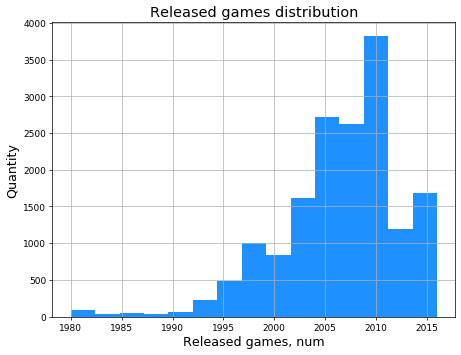

In [32]:
plt.figure(figsize=(8,6), dpi = 65);

plt.hist(data['year_of_release'], color="dodgerblue", bins = 15, range = (1980, 2016));

plt.title('Released games distribution', fontsize=16)
plt.ylabel('Quantity', fontsize=14)
plt.xlabel('Released games, num', fontsize=14)

plt.grid()
plt.show()

В связи с незначительным количеством выпущенных игр в период с 1980 по 1993, можно признать этот период не настолько статистически важным.

<a id='Распределение продаваемых игр на разных платформах'></a>

### <p style="text-align:center">Распределение продаваемых игр на разных платформах</p>

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

Оставим в качестве самых продаваемых платформ первые 7, они идут с большим отрывом от остальных, или набирают популярность.

In [33]:
big_platforms = data.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head(7)

In [34]:
data_big_platforms = data.query('platform in @big_platforms.index and year_of_release > 1993')
data_big_platforms['platform'] = data_big_platforms['platform'].astype('object')

На графике видно, что характерный срок появления новых и исчезновения старых платформ составляет около 9-11 лет. Актуальным периодом, в таком случае, будем считать период с 2013-2014 года, где будем учитывать как набирающие популярность платформы (PS4), так и платформы, теряющие популярность(PS3, XBOX360).

In [35]:
def plot_graph(data, x_var, groupby_var, stacked, title, xlabel, ylabel):
    df_agg = data.loc[:, [x_var, groupby_var]].groupby(groupby_var)
    vals = [data[x_var].values.tolist() for i, data in df_agg]
    
    plt.figure(figsize=(13,10), dpi = 80);
    colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
    n, bins, patches = plt.hist(vals, data[x_var].unique().__len__(), stacked=stacked, density=False, color=colors[:len(vals)])
    
    plt.legend({group:col for group, col in zip(np.unique(data[groupby_var]).tolist(), colors[:len(vals)])})
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    try:
        plt.xticks(ticks=bins, labels=np.unique(data[x_var]).tolist(), rotation=45, horizontalalignment='left')
    except:
        plt.xticks()
    plt.show()

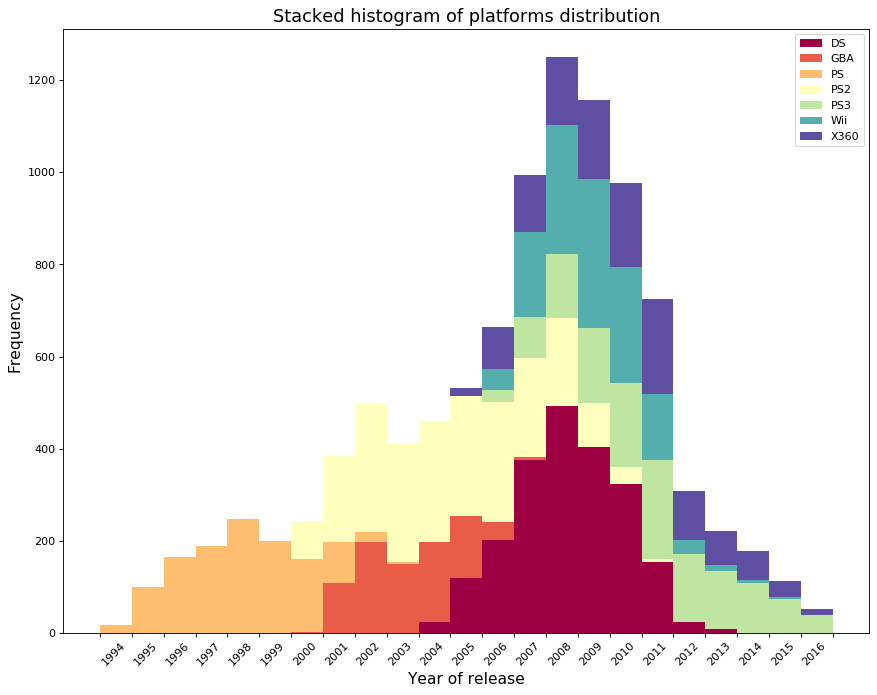

In [36]:
plot_graph(data_big_platforms, x_var='year_of_release', groupby_var='platform', stacked=True,
          title='Stacked histogram of platforms distribution', xlabel='Year of release', ylabel='Frequency')

<a id='Анализ актуального периода'></a>

### <p style="text-align:center">Анализ актуального периода</p>

Посмотрим на популярные платформы по актуальному периоду. Оставим 8 самых продаваемых.

In [37]:
current_period_data = data.query('year_of_release > 2013')
current_big_platforms = current_period_data.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head(8)

In [38]:
current_data_big_platforms = current_period_data.query('platform in @current_big_platforms.index')
current_data_big_platforms['platform'] = current_data_big_platforms['platform'].astype('object')

Посмотрим на динамику роста различных платформ. На графиках ниже видно, что платформы 3DS, PS3, PSV, WiiU и X360 теряют популярность, а PC, PS4, XOne растут.

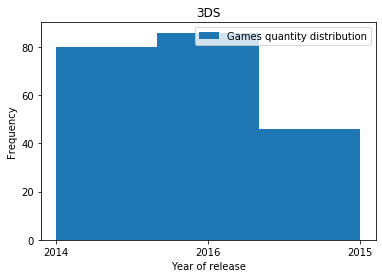

Количество выпущенных игр на платформе 3DS: 212


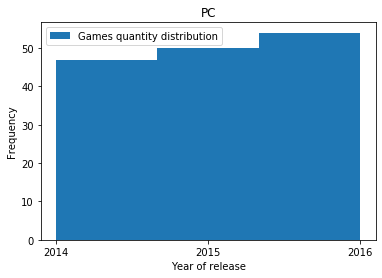

Количество выпущенных игр на платформе PC: 151


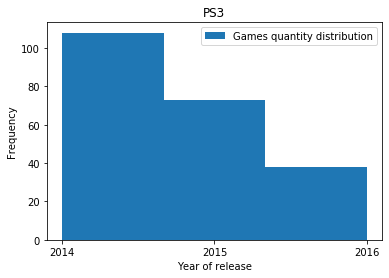

Количество выпущенных игр на платформе PS3: 219


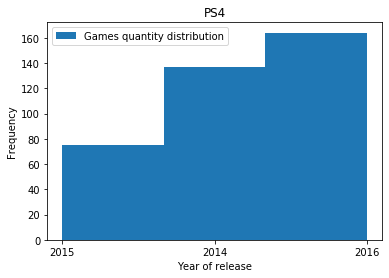

Количество выпущенных игр на платформе PS4: 376


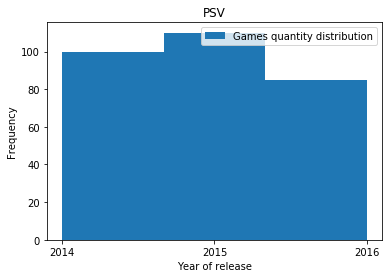

Количество выпущенных игр на платформе PSV: 295


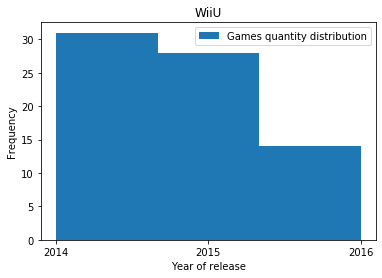

Количество выпущенных игр на платформе WiiU: 73


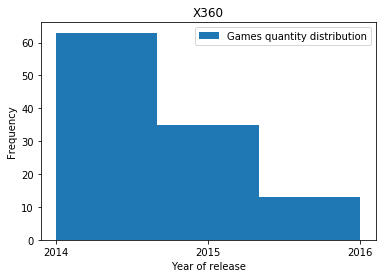

Количество выпущенных игр на платформе X360: 111


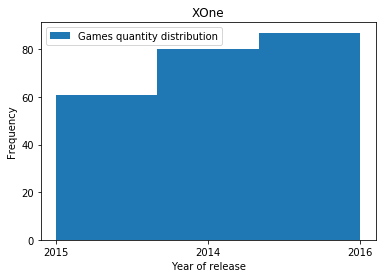

Количество выпущенных игр на платформе XOne: 228


In [39]:
for name, data in current_data_big_platforms.groupby('platform'):
    y_var = 'year_of_release'
    data.plot(y = y_var, title = name, kind = 'hist', bins = 3)
    plt.xticks(ticks = data[y_var].unique(), labels=np.unique(data[y_var]).tolist())
    plt.xlabel('Year of release', fontsize=10)
    plt.legend(['Games quantity distribution']) 
    plt.show()
    print(f'Количество выпущенных игр на платформе {name}: {data.shape[0]}');

На графике ниже видно, что по все платформы в основном имеют невысокие продажи каждой отдельной игры. Хвосты указывают не на наличие выбросов, а на наличие суперуспешных или мегаприбыльных игр.

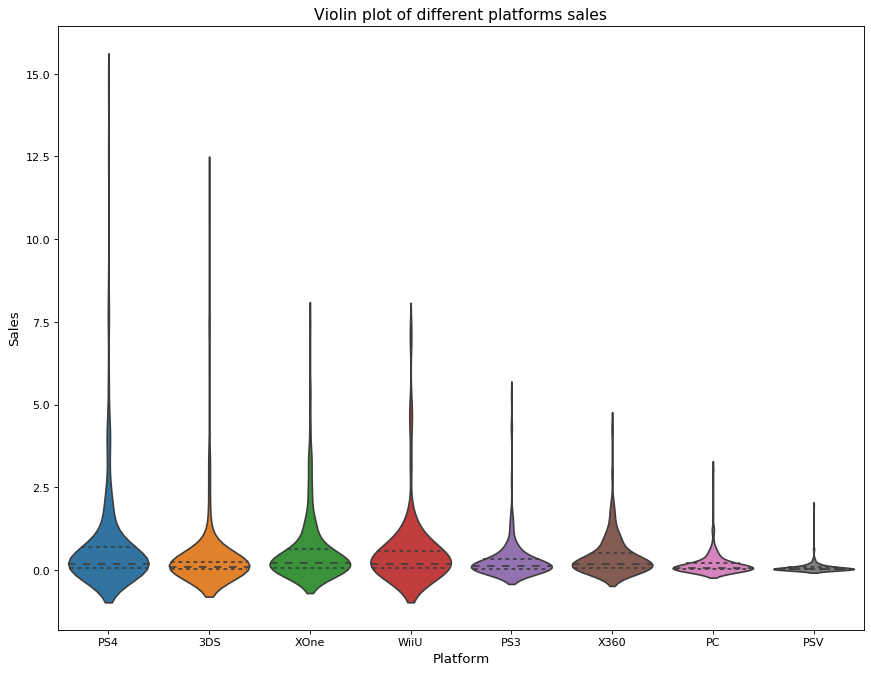

In [40]:
plt.figure(figsize=(13,10), dpi= 80);
sns.violinplot(x='platform', y='total_sales', data=current_data_big_platforms, scale='width', inner='quartile')

plt.title('Violin plot of different platforms sales', fontsize=14)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.show()

<a id='Зависимость продаж от оценок игроков и критиков'></a>

### <p style="text-align:center">Зависимость продаж от оценок игроков и критиков</p>

Для анализа выберем самую популярную платформу - PS4.

На графике ниже видна средняя положительная корреляция общих продаж к оценкам критиков.

In [41]:
def plot_graph_seaborn(data, x, y, title, xlabel, ylabel, ylim):
    sns.set_style('whitegrid')
    var = sns.lmplot(x = x, y = y, data = data, height = 7, aspect = 1.6, robust = True, 
                   scatter_kws = dict(s = 60, linewidths = 0.7, edgecolors = 'black'))
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize = 12)
    plt.ylabel(ylabel, fontsize=12)
    var.set(xlim=(0, 14), ylim = ylim)
    plt.show()

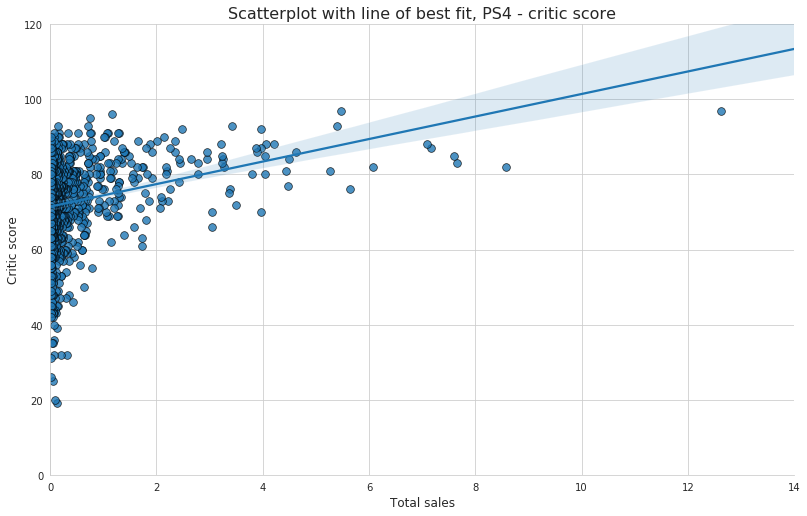

In [42]:
plot_graph_seaborn(data = current_data_big_platforms, x = 'total_sales', y = 'critic_score',
                   title = 'Scatterplot with line of best fit, PS4 - сritic score', 
                   xlabel =  'Total sales', ylabel = 'Critic score', ylim=(0, 120))

На графике ниже видна небольшая отрицательная корреляция общих продаж к оценкам игроков.

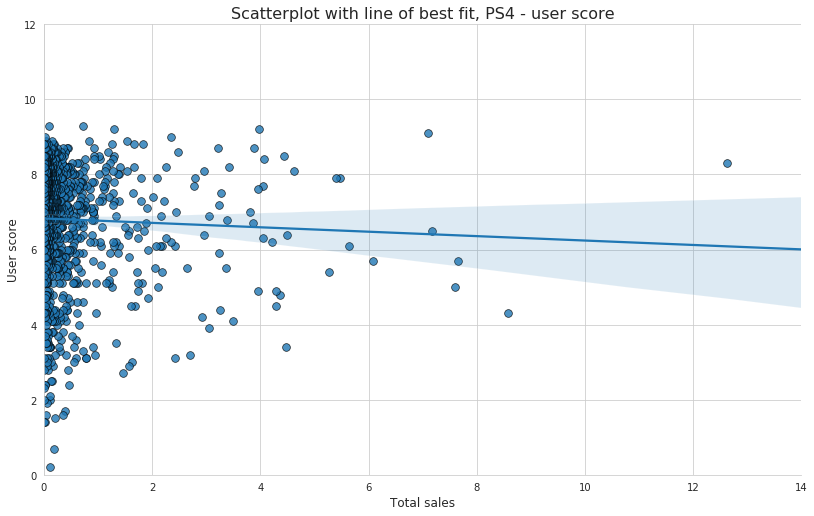

In [43]:
plot_graph_seaborn(data = current_data_big_platforms, x = 'total_sales', y = 'user_score',
                   title = 'Scatterplot with line of best fit, PS4 - user score', 
                   xlabel = 'Total sales', ylabel = 'User score', ylim=(0, 12))

Посчитаем корреляцию для платформы PS4.

In [44]:
def calculate_correlation(data, single_platform, caption, platform_name = None):
    if single_platform:
        return data.loc[data['platform'] == platform_name][['critic_score', 'user_score', 'total_sales']].corr().\
        style.background_gradient(subset=['critic_score', 'user_score', 'total_sales'], cmap='Greens').\
        set_caption(caption).\
        set_table_styles([{'selector': 'caption', 'props': [('color', 'green'), ('font-size', '15px')]}])
    else:
        return data.groupby('platform')['critic_score','user_score', 'total_sales'].corr().\
        style.background_gradient(subset=['critic_score', 'user_score', 'total_sales'], cmap='Blues').\
        set_caption(caption).\
        set_table_styles([{'selector': 'caption', 'props': [('color', 'blue'), ('font-size', '15px')]}])

In [45]:
calculate_correlation(data = current_data_big_platforms, single_platform = True, platform_name = 'PS4',
                      caption = 'Correlation of PS4')

,critic_score,user_score,total_sales
critic_score,1,0.546434,0.402661
user_score,0.546434,1,-0.0401316
total_sales,0.402661,-0.0401316,1


Можно сказать, что между отзывами критиков и продажами существует небольшая положительная корреляция, а между отзывами игроков и продажами - небольшая отрицательная корреляция.

In [46]:
calculate_correlation(data = current_data_big_platforms, single_platform = False, caption = 'Correlation of other platforms')

Посмотрим на корреляцию интересующих нас показателей на остальных платформах. В целом картина по популярным платформам примерно одинаковая - средняя положительная корреляция продаж с отзывами критиков и небольшая отрицательная корреляция продаж с отзывами игроков. Это может быть связано с завышеными ожиданиями игроков после, скажем, просмотра хорошей демки и положительных отзывов критиков.

<a id='Распределение игр по жанрам'></a>

### <p style="text-align:center">Распределение игр по жанрам</p>

К жанрам с высокими продажами можно отнести Action, Role-Playing, Shooter, Sports. К жанрам с низкими продажами - Strategy, Puzzle, Simulation и Platform.

In [47]:
current_data_big_platforms.pivot_table(index = ['genre', 'platform'], 
                                       values = 'total_sales', 
                                       aggfunc = 'sum').unstack().style.highlight_max(axis='columns')

Самой большой популярностью у игроделов пользуется жанр Fighting, хотя этот жанр один из самых неприбыльных. Самые прибыльные жанры - Action, Shooter, Sports - имеют не настолько много выпущенных игр, и, соответственно, имеют бОльшую прибыльность с каждой выпущенной игры.

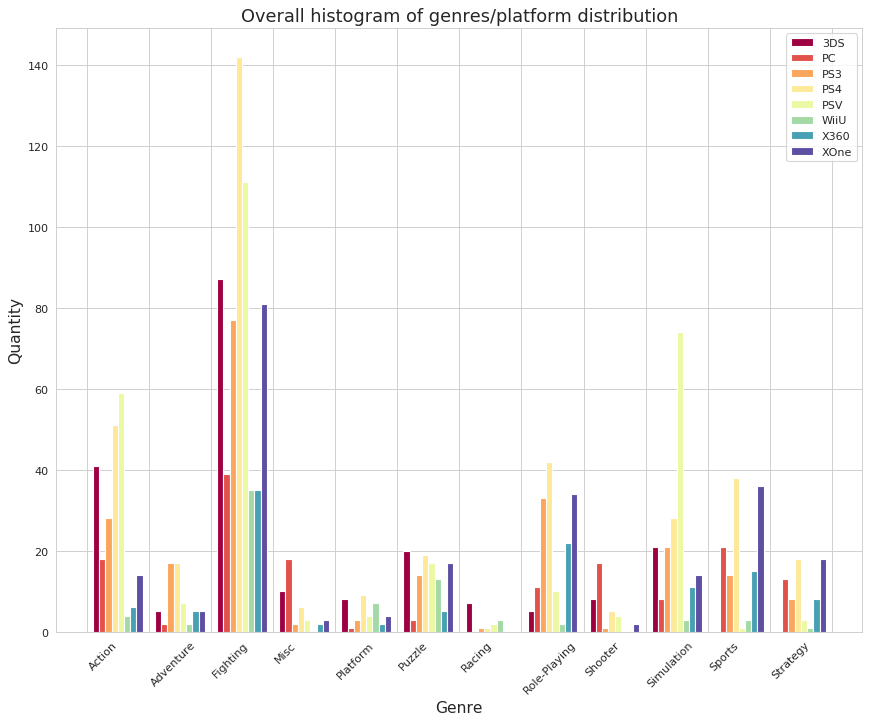

In [48]:
plot_graph(current_data_big_platforms, x_var='genre', groupby_var='platform', stacked=False,
          title='Overall histogram of genres/platform distribution', xlabel='Genre', ylabel='Quantity')

<a id='Вывод_3'></a>

### <p style="text-align:center"> Вывод</p>

##### Таким образом в данной части нашего исследовании мы:

___


1. Посмотрели сколько игр выпускалось за предыдущие годы, выделили статистически неважный период.


2. Вывели распределение игр по платформам, определили актуальный для анализа период.


3. Проанализировали актуальный период.


4. Выявили закономерности между продажами и оценками игроков и критиков. 


5. Провели анализ распределения игр по жанрам, выявили самые прибыльные и популярные у игроделов жанры за актуальный период.

___


Таким образом, был проведен исследовательский анализ данных. Переходим к составлению портрета пользователя каждого региона.

 ## Часть 4. Составление портрета пользователя каждого региона

<a id='Определение самых популярных платформ для каждого региона'></a>

### <p style="text-align:center"> Определение самых популярных платформ для каждого региона</p>

Итак, в Северной Америке самыми популярными платформами являются PS4, XOne, X360, 3DS и PS3. 

В Европе самыми популярными платформами являются PS4, XOne, PS3, PC и 3DS.

В Японии - 3DS, PS4, PSV, PS3 и WiiU.

Различия в долях продаж связаны с локальными особенностями рынков, где, например, японцы отдают предпочтение игровой платформе Nintendo, а европейцы и американцы - PS4 и XOne. Возможно дело в том, что Nintendo - японская приставка, а PS4 и XOne - американские.

In [49]:
current_data_big_platforms.groupby('platform')[['NA_sales', 'EU_sales', 'JP_sales']].sum()\
                          .style.format("{:.1f}").background_gradient(cmap='Greys', axis=0)

,NA_sales,EU_sales,JP_sales
platform,,,
3DS,22.6,16.1,44.2
PC,7.2,18.0,0.0
PS3,22.0,25.5,11.2
PS4,98.6,130.0,15.0
PSV,2.5,3.5,14.5
WiiU,19.4,13.1,7.3
X360,28.3,15.5,0.1
XOne,81.3,46.2,0.3


<a id='Определение самых популярных жанров для каждого региона'></a>

### <p style="text-align:center"> Определение самых популярных жанров для каждого региона</p>

Как видно из таблицы ниже, самые популярные жанры в Северной Америке и Европе - Action, Shooter, Sports.

В Японии же предпочитают Action, Role-Playing и другие.

Особенности здесь объясняются предпочтениями японцев в выборе игр - так, например, в Японии очень популярны игры Japanese Role-Playing Games, такие как Dragon Slayer и ее копии, Dragon Quest и т.д.

In [50]:
current_data_big_platforms.groupby('genre')[['NA_sales', 'EU_sales', 'JP_sales']].sum()\
                          .style.format("{:.1f}").background_gradient(cmap='Greys', axis=0)

,NA_sales,EU_sales,JP_sales
genre,,,
Action,72.1,74.0,29.4
Adventure,5.6,6.4,3.5
Fighting,12.4,6.7,6.4
Misc,13.6,11.4,5.6
Platform,6.8,6.8,2.7
Puzzle,0.6,0.5,0.9
Racing,8.7,14.1,1.8
Role-Playing,33.5,28.2,31.2
Shooter,79.0,65.5,4.9


<a id='Влияние рейтинга ESRB на продажи в отдельном регионе'></a>

### <p style="text-align:center"> Влияние рейтинга ESRB на продажи в отдельном регионе </p>

В таблице ниже показаны продажи игр в отдельном регионе по рейтингам. Выглядит странно, что у игр с рейтингом RP (не определен, ожидает присвоения) столько продаж в Японии и других странах, возможно это связано с предзаказами игр. Также напрашивается вывод, что в Японии большинство начинает играть с 13 лет, а в Европе и Америке - с 17 лет.

In [51]:
current_data_big_platforms['rating'] = current_data_big_platforms['rating'].astype('object')
current_data_big_platforms.groupby('rating')[['NA_sales', 'EU_sales', 'JP_sales']].sum()\
                          .style.format("{:.1f}").background_gradient(cmap='Greys', axis=0)

,NA_sales,EU_sales,JP_sales
rating,,,
E,50.6,57.6,8.9
E10+,31.3,24.1,4.5
M,96.4,93.4,8.0
RP,64.7,58.8,56.5
T,39.0,34.1,14.8


<a id='Вывод_4'></a>

### <p style="text-align:center"> Вывод</p>

##### Таким образом в данной части нашего исследовании мы:

___


1. Определили самые популярные платформы для каждого региона. Для Европы это PS4, XOne, PS3, PC и 3DS; для Америки - PS4, XOne, X360, 3DS и PS3; для Японии - 3DS, PS4, PSV, PS3 и WiiU.


2. Посмотрели на самые популярные жанры для каждого региона. Для Европы и Америки это Action, Shooter, Sports; для Японии - Action, Role-Playing.


3. Выявили влияние рейтинга ESRB на продажи в отдельном регионе. Так, игры с рейтингом E10+ нечасто покупают во всех регионах, рейтинг М серьезно влияет на продажи в Японии, в лидерах продаж в Японии игры с рейтингом RP, в Европе и Америке - с рейтингом М.


___


Резюмируя данную часть работы, можно составить полный портрет пользователя каждого региона. Так, пользователи Северной Америки и Европы схожи между собой, в актуальном периоде играют в основном в PS4 и XOne, из жанров предпочитают Action, Shooter и Sports, играют в основном в игры с достаточно высоким возрастным рейтингом. В отличии от них, японцам по душе их родная Nintendo, они также как американцы и европейцы играют в Action, но жанру Shooter предпочитают Role-Playing, в лидерах продаж у них игры с рейтингом RP.


___


Таким образом, был составлен портрет пользователя каждого региона. Переходим к проверке гипотез.

 ## Часть 5. Проверка гипотез

<a id='Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"'></a>

### <p style="text-align:center"> Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые' </p>

Сформулируем нулевую гипотезу H0. В данном случае наша гипотеза будет звучать как "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые", от есть они равны. Тогда альтернативная гипотеза H1 будет "Средние пользовательские рейтинги платформ Xbox One и PC различаются".

Проверяем распределения на нормальность по тесту Шапиро-Вилка. В обоих случаях отклоняем гипотезу о нормальности. 

In [52]:
data_XOne = current_data_big_platforms.query('platform == "XOne"')['user_score'].dropna()
data_PC = current_data_big_platforms.query('platform == "PC"')['user_score'].dropna()

In [53]:
def check_shapiro(data):
    stat, p = st.shapiro(data)
    print('statistics=%.3f, p-value=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Принять гипотезу о нормальности')
    else:
        print('Отклонить гипотезу о нормальности')

In [54]:
check_shapiro(data_XOne)

statistics=0.953, p-value=0.000
Отклонить гипотезу о нормальности


In [55]:
check_shapiro(data_PC)

statistics=0.950, p-value=0.000
Отклонить гипотезу о нормальности


Применяем критерий Манна-Уитни. Пишем код, который на выходе даст условную вероятность того, что наша нулевая гипотеза H0 верна, а также автоматически сравнит полученную условную вероятность с пороговым значением. Если пороговое значение выше, мы отвергнем нулевую гипотезу.

In [56]:
def check_mannwhitneyu(data1, data2):
    results = st.mannwhitneyu(data1, data2)
    print('p-значение:', results.pvalue)
    alpha = 0.05
    if results.pvalue > alpha:
        print('Не получилось отвергнуть нулевую гипотезу')
    else:
        print('Отвергаем нулевую гипотезу')

In [57]:
check_mannwhitneyu(data_XOne, data_PC)

p-значение: 0.13876434863881087
Не получилось отвергнуть нулевую гипотезу


Для проверки, зная, что при достаточном объеме выборки также можно применять критерий Стюдента, даже если выборка не распределена нормально, сделаем это.

In [58]:
def check_ttest(data1, data2):
    results = st.ttest_ind(data1, data2)
    print('p-значение:', results.pvalue)
    alpha = 0.05
    if (results.pvalue > alpha):
        print('Не получилось отвергнуть нулевую гипотезу')
    else:
        print('Отвергаем нулевую гипотезу')

In [59]:
check_ttest(data_XOne, data_PC)

p-значение: 0.10450648637161196
Не получилось отвергнуть нулевую гипотезу


Результаты по обоим проверкам сходны между собой. Такам образом, с условной вероятностью от 11 до 14%, такое или большее различие нельзя получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтингами.

<a id='Гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные"'></a>

### <p style="text-align:center"> Гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные" </p>

Сформулируем нулевую гипотезу H0. В данном случае наша гипотеза будет звучать как "Средние пользовательские рейтинги жанров Action и Sports не различаются", от есть они равны. Тогда альтернативная гипотеза H1 будет "Средние пользовательские рейтинги жанров Action и Sports различаются".

In [60]:
data_Action = current_data_big_platforms.query('genre == "Action"')['user_score'].dropna()
data_Sports = current_data_big_platforms.query('genre == "Sports"')['user_score'].dropna()

In [61]:
check_shapiro(data_Action)

statistics=0.907, p-value=0.000
Отклонить гипотезу о нормальности


In [62]:
check_shapiro(data_Sports)

statistics=0.977, p-value=0.028
Отклонить гипотезу о нормальности


Применяем критерий Манна-Уитни. Пишем код, который на выходе даст условную вероятность того, что наша нулевая гипотеза H0 верна, а также автоматически сравнит полученную условную вероятность с пороговым значением. Если пороговое значение выше, мы отвергнем нулевую гипотезу.

In [63]:
check_mannwhitneyu(data_Action, data_Sports)

p-значение: 1.0733598502946829e-16
Отвергаем нулевую гипотезу


Для проверки, зная, что при достаточном объеме выборки также можно применять критерий Стюдента, даже если выборка не распределена нормально, сделаем это.

In [64]:
check_ttest(data_Action, data_Sports)

p-значение: 5.3455093328529915e-19
Отвергаем нулевую гипотезу


Результаты по обоим проверкам сходны между собой. Таким образом, с условной вероятнотностью в 99,99% можно сделать вывод о том, что cредние пользовательские рейтинги жанров Action и Sports действительно различаются.

<a id='Вывод_5'>

### <p style="text-align:center"> Вывод </p>

##### Таким образом в заключительной части нашего исследовании мы:

___


1. Проверили гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". И она была отвергнута.


2. Проверили гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные". И она подтвердилась.


___


Резюмируя, была выполнена заключительная часть нашего исследования, в которой мы сформировали и проверили несколько гипотез.

 ## Часть 6. Общий вывод 

<a id='Вывод_6'>

### <p style="text-align:center"> Общий вывод о проделанной работе </p>

Таким образом, на основе предоставленного датасета была выполнена работа по поиску необходимой информации, ее анализу и проверке гипотез.

___


- В первую очередь было произведено импортирование необходимых библиотек, загрузка датасета и получение о нем общей информации. Уже на этом этапе в данных обнаружились проблемы, подробнее о которых можно почитать <a href='#Вывод_1'>здесь</a>.


- Для устранения выявленных дефектов данных была выполнена предобработка данных. В процессе работы были применены необходимые методы и атрибуты. Подробнее о каждой операции по предобработке данных написано в соответствующем пункте работы. Выводы по проделанной в этом пункте работе можно посмотреть <a href='#Вывод_2'>здесь</a>.


- Далее мы занялись исследовательским анализом данных, выводили много histograms, scatterplots and violin plots, считали корреляции, анализировали распределения, и делали на основании всего этого выводы. <a href='#Вывод_3'>Здесь</a> все описано подробнее.


- После исследовательского анализа приступили к формированию портрета пользователя в зависимости от региона. Самая маленькая, одна из самых важных частей нашей работы, с выводами которой можно ознакомиться <a href='#Вывод_4'>здесь</a>.


- Ну и в заключительной части нашего исследования мы проверили несколько гипотез и сделали выводы на основе условных вероятностей. Подробности можно найти <a href='#Вывод_5'>здесь</a>.


___


Главная цель нашего исследования - поиск критериев успешности игры для актуального периода. В зависимости от того, для какого рынка мы работаем или собираемся это делать, можно использовать выводы данного исследования для 
определения стратегии компании. 

Cобираясь работать в Японии, предпочтение можно отдать играм с рейтингами RP и T, с жанрами Action и Role-Playing, на платформах 3DS, PS4, PSV. Рынки Северной Америки и Европы схожи, игроки предпочитают PS4 и XOne, самыми прибыльными жанрами будут  Action, Shooter и Sports, играют в основном в игры с достаточно высоким возрастным рейтингом. Этот выбор обусловлен как предпочтениями пользователей в соответствующем регионе, так и сравнительно высокой рентабельностью игр на этих платформах с этими жанрами. Подробнее можно ознакомиться <a href='#Определение самых популярных платформ для каждого региона'>здесь</a>.


Что касается распространенности, то на всех платформах с большим отрывом лидирует жанр Fighting; похоже, что начинающей игровой компании лучше будет начинать отсюда. Подробнее можно ознакомиться <a href='#Распределение игр по жанрам'>здесь</a>.


Самыми доходными жанрами игр являются Action, Shooter, Sports и Role-Playing. Это логично, ведь это самые популярные жанры во всем мире. Подробнее можно ознакомиться <a href='#Распределение игр по жанрам'>здесь</a>.


Судя по проведенным нами проверкам гипотез, средние пользовательские рейтинги платформ Xbox One и PC отличаются, а средние пользовательские рейтинги жанров Action и Sports отличаются не особо. Подробнее можно ознакомиться <a href='#Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"'>здесь</a>.


Стоит отметить различия между рейтингами критиков и пользователей. Критики в общем случае склонны выше оценивать более дорогие игры, в отличие от пользователей. Подробнее можно ознакомиться <a href='#Зависимость продаж от оценок игроков и критиков'>здесь</a>.

___
